In [1]:
import stim

In [2]:
#Estimate logical error rate us stim
import stim
import pymatching
import numpy as np

def logical_errors_rate(circuit: stim.Circuit, num_shots: int) -> float:
    # Sample the circuit.
    sampler = circuit.compile_detector_sampler()
    detection_events, observable_flips = sampler.sample(num_shots, separate_observables=True)

    # Configure a decoder using the circuit.
    detector_error_model = circuit.detector_error_model(decompose_errors=True)
    matcher = pymatching.Matching.from_detector_error_model(detector_error_model)

    # Run the decoder.
    predictions = matcher.decode_batch(detection_events)

    # Count the mistakes.
    num_errors = 0
    for shot in range(num_shots):
        actual_for_shot = observable_flips[shot]
        predicted_for_shot = predictions[shot]
        if not np.array_equal(actual_for_shot, predicted_for_shot):
            num_errors += 1
    return num_errors/num_shots



#circuit = stim.Circuit.generated("repetition_code:memory", rounds=100, distance=9, before_round_data_depolarization=0.03)
#%num_shots = 100_000
#num_logical_errors = count_logical_errors(circuit, num_shots)
#print("there were", num_logical_errors, "wrong predictions (logical errors) out of", num_shots, "shots")



circuit = stim.Circuit.generated(
    "repetition_code:memory",
    rounds=100,
    distance=9,
    before_round_data_depolarization=0.13,
    before_measure_flip_probability=0.01)




num_shots = 100
logical_errors_rate = logical_errors_rate(circuit, num_shots)

In [3]:
num_logical_errors

0.17

Shots = 10, Logical Error Rate = 0.20000
Shots = 50, Logical Error Rate = 0.14000
Shots = 100, Logical Error Rate = 0.11000
Shots = 500, Logical Error Rate = 0.09600
Shots = 1000, Logical Error Rate = 0.08200
Shots = 1500, Logical Error Rate = 0.09200
Shots = 2000, Logical Error Rate = 0.09100
Shots = 2500, Logical Error Rate = 0.09080
Shots = 20000, Logical Error Rate = 0.08810
Shots = 40000, Logical Error Rate = 0.08972
Shots = 60000, Logical Error Rate = 0.09035


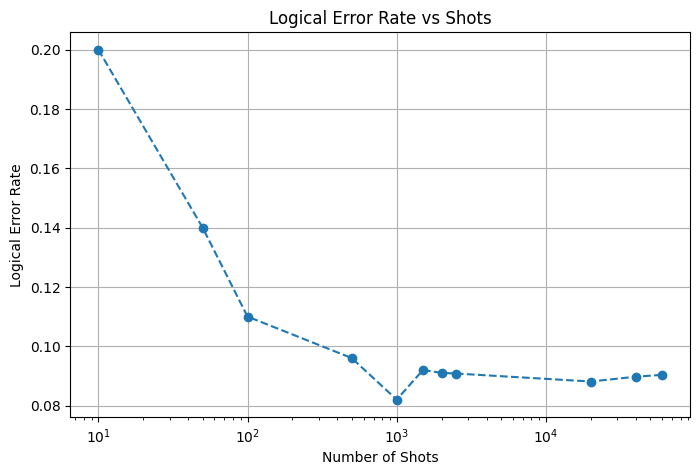

In [7]:
import stim
import pymatching
import numpy as np
import matplotlib.pyplot as plt

def logical_errors_rate(circuit: stim.Circuit, num_shots: int) -> float:
    """Returns the fraction of shots that produce a logical error."""
    # Sample the circuit.
    sampler = circuit.compile_detector_sampler()
    detection_events, observable_flips = sampler.sample(
        shots=num_shots,
        separate_observables=True
    )

    # Build a decoder (pymatching) from the circuit's detector error model.
    detector_error_model = circuit.detector_error_model(decompose_errors=True)
    
    matcher = pymatching.Matching.from_detector_error_model(detector_error_model)

    # Decode detection events to predict which observables flipped.
    predictions = matcher.decode_batch(detection_events)

    # Compare predicted flips to actual flips to count logical errors.
    num_errors = 0
    for shot_idx in range(num_shots):
        actual = observable_flips[shot_idx]
        predicted = predictions[shot_idx]
        if not np.array_equal(actual, predicted):
            num_errors += 1

    return num_errors / num_shots

# Example circuit. Adjust parameters to your needs.
#circuit = stim.Circuit.generated(
#    "repetition_code:memory",
#    rounds=100,
#    distance=25,
#    before_round_data_depolarization=0.13,
#    before_measure_flip_probability=0.01
#)

#circuit = stim.Circuit.generated(
#    "surface_code:rotated_memory_z",
#    rounds=5,
#    distance=5,
#    after_clifford_depolarization=0.005,
#    after_reset_flip_probability=0.005,
#    before_measure_flip_probability=0.005,
#    before_round_data_depolarization=0.005
#)


circuit = stim.Circuit.generated(
    "repetition_code:memory",
    rounds=5,
    distance=5,
    before_round_data_depolarization=0.1,
    before_measure_flip_probability=0.1
)


# Define a range of shot values you want to test.
shot_values = [10, 50, 100, 500,1000,1500,2000,2500,20000,40000,60000]

# Calculate the logical error rate for each shot value.
error_rates = []
for shots in shot_values:
    rate = logical_errors_rate(circuit, shots)
    error_rates.append(rate)
    print(f"Shots = {shots}, Logical Error Rate = {rate:.5f}")

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(shot_values, error_rates, marker='o', linestyle='--')
plt.xscale('log')  # Log scale often makes sense over wide shot ranges
plt.xlabel('Number of Shots')
plt.ylabel('Logical Error Rate')
plt.title('Logical Error Rate vs Shots')
plt.grid(True)
plt.savefig("rep5.png")
plt.show()

In [4]:
import stim
circuit = stim.Circuit.generated(
    "repetition_code:memory",
    rounds=1,
    distance=3,
    before_round_data_depolarization=0.1,
    before_measure_flip_probability=0.1
)

In [6]:
circuit

stim.Circuit('''
    R 0 1 2 3 4
    TICK
    DEPOLARIZE1(0.1) 0 2 4
    CX 0 1 2 3
    TICK
    CX 2 1 4 3
    TICK
    X_ERROR(0.1) 1 3
    MR 1 3
    DETECTOR(1, 0) rec[-2]
    DETECTOR(3, 0) rec[-1]
    X_ERROR(0.1) 0 2 4
    M 0 2 4
    DETECTOR(1, 1) rec[-2] rec[-3] rec[-5]
    DETECTOR(3, 1) rec[-1] rec[-2] rec[-4]
    OBSERVABLE_INCLUDE(0) rec[-1]
''')